서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 *독립동일분포*라 한다.

여기서 확률분포를 F라고 하면 $X_{1},X_{2},X_{3}...,X_{20} \thicksim F$ 와 같이 나타낼 수 있다

독립동일분포는 동일한 조건 아래에서 수행되는 실험이나 관측을 여러 번 반복하여 데이터를 얻는 것을 수학 용어로 나타낸 것이다.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [3]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 독립성

확률변수의 *독립성* 이란, 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념이다.

2차원 확률변수 (X,Y)의 경우, 다음과 같은 관계가 성립할 때 X와 Y는 독립이라고 한다

$$f_{X,Y}(x,y) = f_{X}(x) f_{Y}(y)$$

즉, 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다

### 독립성과 무상관성

공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타낸다

독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다

무상관성보다 독립성이 더 강한 개념으로 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만, X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아니다

두 확률변수 사이에 선형 관계가 없더라도 서로 영향을 끼치는 경우가 있다

In [9]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

이 2차원 확률변수 X와 Y는 독립이므로 무상관이 된다.

In [12]:
Cov(XY)

-8.326672684688674e-17

역으로 무상관인 경우 독립성이 정의되는지 확인해 본다

In [13]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [14]:
Cov(XY)

0.0

공분산이 0이므로 확률변수 X와 Y는 무상관임을 알 수 있다

독립성을 확인하기위해 독립성의 정의인 모든 x,y에 대하여

$$f_{X,Y}(x,y) = f_{X}(x) f_{Y}(y)$$

를 만족하는지 확인한다

여기서는 x와 y에 0을 대입하여

$$f_{X,Y}(0,0) = f_{X}(0) f_{Y}(0)$$

을 만족하는지 확인한다

In [15]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.333)

등식이 성립하지 않으므로 X와 Y는 독립이 아니다

## 합의 분포

합의 분포는 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_{1},X_{2}...,X_{n}$의 합

$\sum_{i=1}^{n} X_{i} = X_{1} + X_{2} +...+ X_{n}$ 이 따르는 확률분포를 의미한다.

합의 분포의 확률함수와 밀도함수를 $X_{1},X_{2}, ... , X_{n}$ 으로부터 직접 유도하기는 어렵다

이 때문에, 우선 합의 분포의 기댓값과 분산에 관해 살펴보자

기댓값은 선형성이 성립한다.

이 선형성을 n 차원으로 확장하면 다음과 같이 말할 수 있다

### 확률변수 합의 기댓값

확률변수 $X_{1},X_{2}, ... , X_{n}$ 에 관해서
$$E(X_{1} + X_{2} +...+ X_{n}) = E(X_{1}) + E(X_{2}) +...+ E(X_{n})$$
이 성립

다음 공식에 따라 합의 분포 기댓값은 각 확률변수 기댓값의 합으로 계산할 수 있다

$X_{1},X_{2}, ... , X_{n}$ 이 서로 독립이라면 $X_{1},X_{2}, ... , X_{n}$ 은 서로 무상관이 되고, 공분산 항은 모두 0이된다

### 확률변수 합의 공식

확률변수 $X_{1},X_{2}, ... , X_{n}$ 이 서로 독립이라면
$$V(X_{1} + X_{2} +...+ X_{n}) = V(X_{1}) + V(X_{2}) +...+ V(X_{n})$$
이 성립

### 정규분포의 합의 분포

서로 독립인 두 확률변수 $X \thicksim N(1,2)$ 와 $Y \thicksim N(2,3)$ 이 있다

이 때 X+Y의 분포는 어떻게 될까



In [16]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

공식으로 구한 이론값에 가까운 값이 나왔다. 표본 크기를 키우면 이론값에 수렴할 것

정규분포의 경우 정규분포의 합도 정규분포가 되는 성질이 있다

이처럼 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서, 그 합도 동일한 확률분포가 되는 성질을 *재생성* 이라고 한다.

모든 확률본포가 재성성을 갖는것은 아니니 유의하자

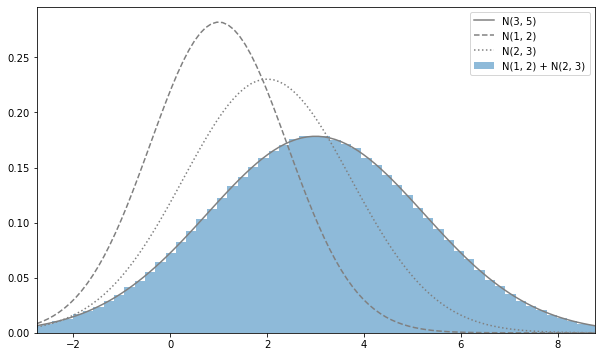

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

### 정규분포의 합의 분포

서로 독립인 확률변수 $X_{1} \thicksim N(\mu_{1},\sigma_{1}^{2}), X_{2} \thicksim N(\mu_{2},\sigma_{2}^{2}), ... , X_{n} \thicksim N(\mu_{n},\sigma_{n}^{2})$ 에 관해서

$$\sum_{i=1}^{n} X_{i} \thicksim N(\sum_{i=1}^{n} \mu_{i}, \sum_{i=1}^{n} \sigma_{i}^{2})$$

이 성립

### 포아송 분포의 합의 분포

서로 독립인 두 확률변수 $X \thicksim Poi(3)$ 과 $Y \thicksim Poi(4)$ 가 있다. 이때 확률변수 X + Y의 분포는 어떻게 될까

$Poi(\lambda)$ 의 기댓값과 분산은 모두 $\lambda$ 이므로, X + Y의 기댓값과 분산은 모두 7이 된다.

In [18]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999034, 6.989995066843997)

이론값에 가까운 값이 나왔다

X+Y 분포의 형태이지만, 포아송 분포도 재생성을 지닌 확률분포이다

이 때문에 X + Y는 포아송 분포를 따르고, X + Y ~ Poi(7)이 된다

<ipython-input-19-bc280e827721>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=20,


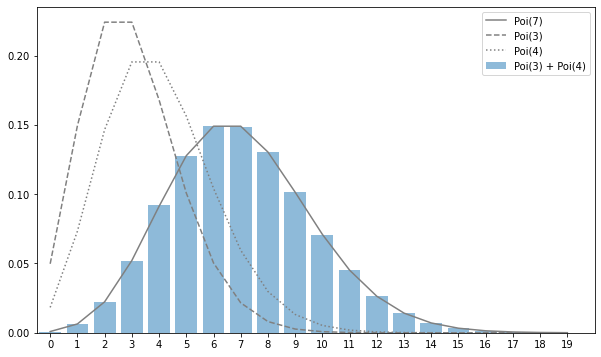

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

정리하자면

### 포아송 분포의 합의 분포

서로 독립인 확률변수 $X_{1} \thicksim Poi(\lambda_{1}), X_{2} \thicksim Poi(\lambda_{2}), ... , X_{n} \thicksim Poi(\lambda_{n})$ 에 관해서

$$\sum_{i=1}^{n} X_{i} \thicksim Poi(\sum_{i=1}^{n}\lambda_{i})$$

가 성립

### 베르누이 분포의 합의 분포

여기서는 $X_{1}, X_{2}, ... , X_{10} \thicksim Bern(0.3)$ 이라고 할 때의 $\sum_{i=1}^{10} X_{i}$ 를 생각해 보자

Bern(p)의 기댓값은 p, 분산은 p(1 - p) 이므로, 기댓값은 3, 분산은 2.1이 된다

In [20]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

주의해야 할 것은 베르누이 분포에는 재생성이 없다는 사실이다

베르누이 분포의 경우, 베르누이 분포의 합은 이항분포가 되는 성질이 있다

이때 이항분포의 파라미터는 그대로 n, p가 된다.

여기서 n = 10, p = 0.3 이므로 $\sum_{i=1}^{10} X_{i} \thicksim Bin(10,0.3)$ 이 된다.

이것의 확률함수를 그려보면

<ipython-input-21-7d4f37ca0ccf>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10,


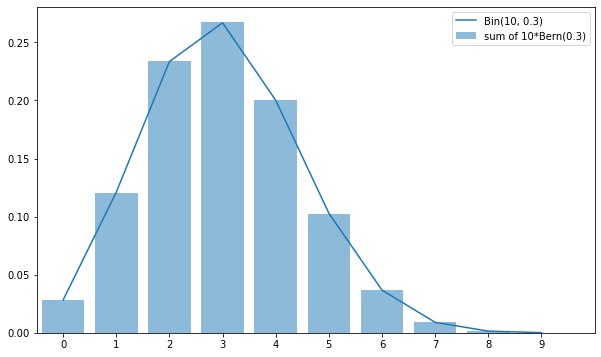

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

### 베르누의 분포의 합의 분포

$X_{1}, X_{2}, ... , X_{n} \thicksim Bern(p)$ 에 관해서

$$\sum_{i=1}^{n} X_{i} \thicksim Bin(n,p)$$

가 성립

## 표본평균의 분포

표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_{1}, X_{2}, ... , X_{n}$ 의 표본평균

$\bar{X} = \frac{X_{1} + X_{2} + ... + X_{n}}{n}$ 이 따르는 분포이다

표본평균의 기댓값은 기댓값의 선형성을 사용하여 다음과 같이 계산한다

$$E(\bar{X}) = E(\frac{X_{1} + X_{2} + ... + X_{n}}{n})$$
$$= \frac{E(X_{1}) + E(X_{2}) + ... + E(X_{n})}{n}$$
$$= \frac{n\mu}{n}$$
$$= \mu$$



표본평균의 분산은 다음과 같이 계산할 수 있다. 기댓값을 계산할 때와는 달리, $V(aX) = a^{2}V(X)$ 가 되는 것에 주의하자

$$V(\bar{X}) = V(\frac{X_{1} + X_{2} + ... + X_{n}}{n})$$
$$= \frac{V(X_{1}) + V(X_{2}) + ... + V(X_{n})}{n^{2}}$$
$$= \frac{n\sigma^{2}}{n^{2}}$$
$$= \frac{\sigma^{2}}{n}$$

### 정규분포의 표본평균 분포

n = 10인 $X_{1} , X_{2} , ... , X_{n} \thicksim N(1,2)$ 의 표본평균 $\bar{X}$ 를 알아보자

In [22]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9995466511402974, 0.19942119653587653)

정규분포의 경우, 표본평균 $\bar{X}$ 도 정규분포가 된다

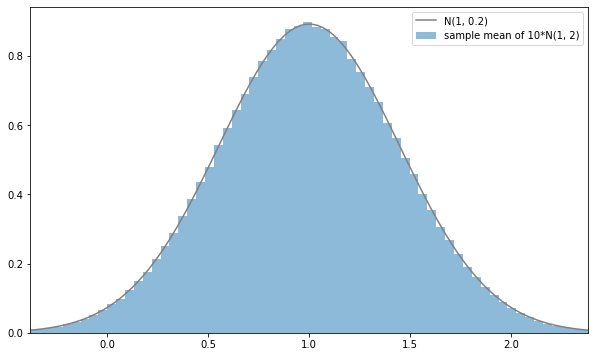

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

이를 정리하면

### 정규분포의 표본평균의 분포

$X_{1}, X_{2}, ... , X_{n} \thicksim N(\mu,\sigma^{2})$ 이라고 할 때

$$\bar{X} \thicksim N(\mu,\frac{\sigma^{2}}{n})$$

이 성립

### 포아송 분포의 표본평균 분포

n = 10인 $X_{1}, X_{2}, ... , X_{n} \thicksim Poi(3)$ 의 표본평균 $\bar{X}$ 를 알아보자

In [27]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9991454, 0.30001874965884007)

기댓값과 분산이 다르므로 $\bar{X}$ 는 이제 포아송 분포를 따르지 않는다

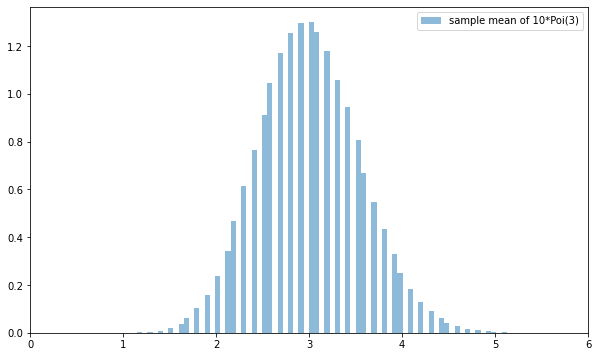

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

포아송 분포의 표본분포는 근사적으로 정규분포를 따른다

### 중심극한정리

포아송 분포나 정규분포같은 재생성이 있는 일부 확률분포를 제외하면, 합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 없다

더 나아가 표본평균의 분포가 되면 재생성을 지닌 포아송 분포조차도 그 형태를 유지할 수 없다

이를 해결할 표본평균의 분포에 관한 매우 강력한 정리인 중심극한정리를 알아보자

*중심극한정리*

확률변수 $X_{1}, X_{2}, ... , X_{n}$ 이 서로 독립이고, 기댓값이 $\mu$ , 분산이 $\sigma^{2}$ 인 확률분포 F를 따를 때,

n이 커짐에 따라 표본평균 $\bar{X}$ 의 분포는 정규분포 $N(\mu,\frac{sigma^{2}}{n})$ 에 가까워진다

원래 분포가 뭐였든 간에, 표본평균의 분포는 정규분포에 가까워진다는 것이다

n = 10000으로 $X_{1}, X_{2}, ... , X_{10000} \thicksim Poi(3)$ 이라고 할 때의 표본평균의 분포를 생각해보자

In [29]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

중심극한정리에 의해, $\bar{X}$ 는 근사적으로 $N(3,\frac{3}{10000})$ 을 따를 것이다

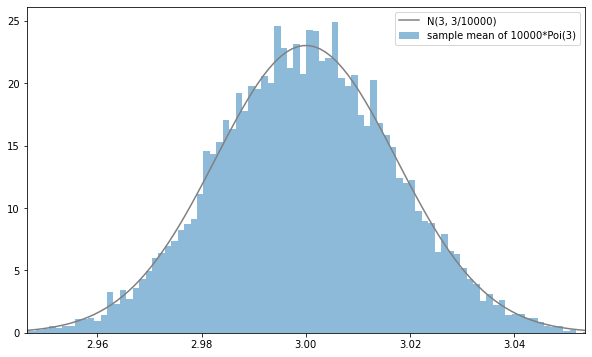

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙

대수의 법칙은 표본 크기를 키우면 표본평균은 모평균에 수렴한다고 주장하는 정리이다

대수의 법칙을 주사위가 6이 나오는지 여부로 확인해 보자

하나하나의 시행은 $Bern(\frac{1}{6})$ 을 따르므로, 표본 크기가 커짐에 따라 표본평균은 $\frac{1}{6}$ 에 수렴할 것이다

In [31]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

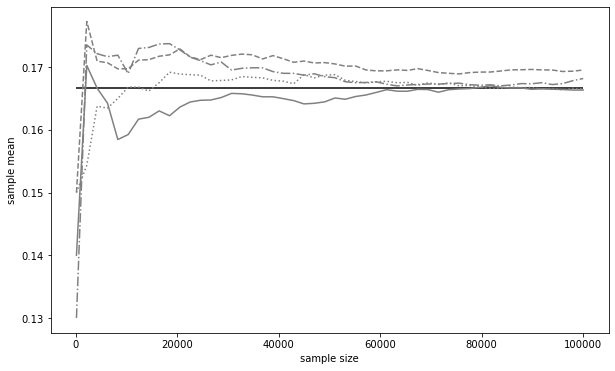

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

표본의 크기가 작을 때는 변동이 있지만, 표본 크기가 커지면서 어떠한 무작위 추출도 그 결과는 $\frac{1}{6}$ 에 가까워지고 있음을 알 수 있다.